# Derivados Financieros 2021 - Clase 5
## Otros modelos de pricing - QuantLib

    0) PnL Explanation
    1) Montecarlo
    2) Diferencias Finitas
  

$$ PnL(hoy) = C(hoy)- C(ayer) = $$

$$ PnL(t=1) = C(t=1)- C(t=0) = dC(t=0) = \frac{dC}{dt}(t=0) $$

$$  \frac{dC}{dt}(t=0) =  \frac{\partial C}{\partial S}(t=0)  \frac{dS}{dt}(t=0) +  \frac{\partial C}{\partial \tau}(t=0)  \frac{d\tau}{dt}(t=0) + \frac{\partial C}{\partial \sigma}(t=0)  \frac{d\sigma}{dt}(t=0) + \frac{1}{2} \frac{\partial C}{\partial S^2}(t=0)  \left(\frac{dS}{dt}(t=0)\right)^2 \cdots $$

$$  PnL =  \frac{\partial C}{\partial S}  dS +  \frac{\partial C}{\partial \tau}  d\tau+ \frac{\partial C}{\partial \sigma}  d\sigma + \frac{1}{2} \frac{\partial C}{\partial S^2} \left(dS\right)^2 + \cdots $$


$$  PnL (hoy) =  \Delta (ayer) (S(hoy)-S(ayer)) +  \Theta(ayer)  + Vega(ayer)  (\sigma(hoy)-\sigma(ayer)) + \frac{1}{2} \Gamma  (ayer) (S(hoy)-S(ayer))^2 + \cdots $$










Este analisis nos permite por un lado verificar si nuestro modelo de precios es adecuado para el mercado y por otro, tener un control explicativo de la dinamica del precio.

Un test de PnL es un tipico ananlsis de control de riesgo. La idea es por un lado tomar 30 (u otra cantidad de dias) del pasado de datos de mercado y:

    - Por un lado calcular el PnL real, de mercado - por ejemplo call europea 


$$ C(t+1)+C(t) $$

- Por el otro con los datos de mercado de spot, volatilidad y las griegas de nuestro modelo, llegar al PnL de modelo
    - Finalemnte hacer una regrecion entre ambas
    



## Ejercicio Realizar El PnL explanation del sigueinte data historica



In [1]:
import pandas as pd
stock_data = pd.read_pickle("./stock.pkl")


option_data = pd.read_pickle("./option.pkl")

In [2]:
stock_data['day_num']=list(range(len(stock_data.index)))
stock_data



AAPL.OQ,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,day_num
Date,,,,,,,
2020-07-01,367.36,364.11,363.91,365.01,92072.0,6988790.0,0
2020-07-02,370.46,364.11,363.77,367.88,88893.0,7383006.0,1
2020-07-06,375.77,373.85,369.87,369.95,97020.0,8166626.0,2
2020-07-07,378.60,372.69,372.23,375.54,87691.0,7127551.0,3
2020-07-08,381.47,381.37,376.42,376.92,91659.0,7538375.0,4
2020-07-09,385.27,382.73,378.70,385.00,112073.0,7596239.0,5
2020-07-10,383.88,383.68,378.85,382.03,85262.0,6229963.0,6
2020-07-13,399.82,381.91,381.04,389.06,160361.0,11564198.0,7
2020-07-14,389.00,388.23,375.53,379.50,141689.0,10757195.0,8


In [3]:

option_data['day_num']=list(range(len(option_data.index)))
option_data['vol_imp'] = 0.0

option_data


AAPLJ162041000.U,HIGH,CLOSE,LOW,OPEN,VOLUME,day_num,vol_imp
Date,,,,,,,
2020-07-01,9.22,8.45,8.25,9.12,75.0,0,0.0
2020-07-02,9.60,7.45,7.45,9.60,158.0,1,0.0
2020-07-06,9.60,9.10,8.50,9.01,404.0,2,0.0
2020-07-07,10.82,10.03,9.30,9.30,152.0,3,0.0
2020-07-08,12.45,12.45,10.50,10.50,176.0,4,0.0
2020-07-09,14.11,13.35,12.85,13.79,180.0,5,0.0
2020-07-10,14.05,14.02,12.99,14.05,19.0,6,0.0
2020-07-13,22.96,15.83,15.83,17.50,917.0,7,0.0
2020-07-14,18.00,18.00,13.25,14.60,239.0,8,0.0


In [4]:
from datetime import date
business_days = [date.date() for date in option_data.index]
business_days

[datetime.date(2020, 7, 1),
 datetime.date(2020, 7, 2),
 datetime.date(2020, 7, 6),
 datetime.date(2020, 7, 7),
 datetime.date(2020, 7, 8),
 datetime.date(2020, 7, 9),
 datetime.date(2020, 7, 10),
 datetime.date(2020, 7, 13),
 datetime.date(2020, 7, 14),
 datetime.date(2020, 7, 15),
 datetime.date(2020, 7, 16),
 datetime.date(2020, 7, 17),
 datetime.date(2020, 7, 20),
 datetime.date(2020, 7, 21),
 datetime.date(2020, 7, 22),
 datetime.date(2020, 7, 23),
 datetime.date(2020, 7, 24),
 datetime.date(2020, 7, 27),
 datetime.date(2020, 7, 28),
 datetime.date(2020, 7, 29),
 datetime.date(2020, 7, 30),
 datetime.date(2020, 7, 31)]

In [5]:

PnL_df = pd.DataFrame(index = business_days, columns = ['PnL_Mercado', 'PnL_Modelo_Explained', 'Delta', 'Theta', 'Vega','Gamma', 'PnL_Modelo_Unexplained','day_num', 'Precio_Mercado', 'Precio_Modelo','imp_vol'])
PnL_df['day_num']=list(range(len(PnL_df.index)))

PnL_df.PnL_Mercado = 0.0
PnL_df.Precio_Modelo = 0.0

PnL_df.PnL_Modelo_Explained = 0.0
PnL_df.Delta = 0.0
PnL_df.Theta = 0.0
PnL_df.Vega = 0.0
PnL_df.Gamma = 0.0
PnL_df.PnL_Modelo_Unexplained = 0.0
PnL_df.imp_vol = 0.0



PnL_df.Precio_Mercado = option_data.CLOSE

PnL_df


,PnL_Mercado,PnL_Modelo_Explained,Delta,Theta,Vega,Gamma,PnL_Modelo_Unexplained,day_num,Precio_Mercado,Precio_Modelo,imp_vol
2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.45,0.0,0.0
2020-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.45,0.0,0.0
2020-07-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,9.10,0.0,0.0
2020-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,10.03,0.0,0.0
2020-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,12.45,0.0,0.0
2020-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,13.35,0.0,0.0
2020-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,14.02,0.0,0.0
2020-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,15.83,0.0,0.0
2020-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,18.00,0.0,0.0
2020-07-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,19.24,0.0,0.0


In [6]:
for i in PnL_df['day_num'].values[1:]:
    PnL_df['PnL_Mercado'].values[i] = option_data.CLOSE.values[i] - option_data.CLOSE.values[i-1]


In [7]:
PnL_df

,PnL_Mercado,PnL_Modelo_Explained,Delta,Theta,Vega,Gamma,PnL_Modelo_Unexplained,day_num,Precio_Mercado,Precio_Modelo,imp_vol
2020-07-01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,8.45,0.0,0.0
2020-07-02,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,1,7.45,0.0,0.0
2020-07-06,1.65,0.0,0.0,0.0,0.0,0.0,0.0,2,9.10,0.0,0.0
2020-07-07,0.93,0.0,0.0,0.0,0.0,0.0,0.0,3,10.03,0.0,0.0
2020-07-08,2.42,0.0,0.0,0.0,0.0,0.0,0.0,4,12.45,0.0,0.0
2020-07-09,0.90,0.0,0.0,0.0,0.0,0.0,0.0,5,13.35,0.0,0.0
2020-07-10,0.67,0.0,0.0,0.0,0.0,0.0,0.0,6,14.02,0.0,0.0
2020-07-13,1.81,0.0,0.0,0.0,0.0,0.0,0.0,7,15.83,0.0,0.0
2020-07-14,2.17,0.0,0.0,0.0,0.0,0.0,0.0,8,18.00,0.0,0.0
2020-07-15,1.24,0.0,0.0,0.0,0.0,0.0,0.0,9,19.24,0.0,0.0


In [8]:
import datetime
r = 0.025
sigma = 0.287
K = 410
div = 0.01
tipo = "C"
expiry_datetime = datetime.date(2020,10,16)

h = 0.1
h_vol = 0.01
pasos = 250


In [9]:
from opcion_europea_bs import opcion_europea_bs
from opcion_americana_bin import opcion_americana_bin
from vol_implicita import impvolfunc_bs
from vol_implicita import impvolfunc_bin


In [10]:
for i in PnL_df['day_num'].values:
    
    TTM = (expiry_datetime - PnL_df.index.values[i]).days
    T = TTM/365.0
    S = stock_data.CLOSE.values[i]
    
    C = opcion_europea_bs(tipo, S, K, T, r, sigma, div)
    
    
    PnL_df['Precio_Modelo'].values[i] = C
    
    
    PnL_df['imp_vol'].values[i] = impvolfunc_bs(tipo, stock_data.CLOSE.values[i], K, T, r, option_data.CLOSE.values[i] , div)
    
    sigma = PnL_df['imp_vol'].values[i]
    
    
    C_Sup = opcion_europea_bs(tipo, S + h, K, T, r, sigma, div)
    C_Sdown = opcion_europea_bs(tipo, S - h, K, T, r, sigma, div)
    
    PnL_df['Delta'].values[i] = (C_Sup - C_Sdown) / (2*h) 
    
    PnL_df['Gamma'].values[i] = (C_Sup - 2 * C + C_Sdown) / (h**2) 
    
    C_prox = opcion_europea_bs(tipo, S, K, T-1/252.0, r, sigma, div)
    
    PnL_df['Theta'].values[i] = (C_prox - C)
    

    
    C_volup = opcion_europea_bs(tipo, S, K, T, r, sigma + h_vol, div)
    C_voldown = opcion_europea_bs(tipo, S , K, T, r, sigma - h_vol, div)
    
    PnL_df['Vega'].values[i] = (C_volup - C_voldown) / (2*h_vol) 
    
    


In [11]:
PnL_df

,PnL_Mercado,PnL_Modelo_Explained,Delta,Theta,Vega,Gamma,PnL_Modelo_Unexplained,day_num,Precio_Mercado,Precio_Modelo,imp_vol
2020-07-01,0.00,0.0,0.260637,0.299910,63.919372,86.413739,0.0,0,8.45,8.017959,0.293798
2020-07-02,-1.00,0.0,0.246122,-1.031385,61.733681,-181.757184,0.0,1,7.45,8.358815,0.279288
2020-07-06,1.65,0.0,0.291661,-0.774212,67.713234,-127.706278,0.0,2,9.10,9.738564,0.269919
2020-07-07,0.93,0.0,0.300105,1.208577,68.058931,271.235183,0.0,3,10.03,8.673855,0.290105
2020-07-08,2.42,0.0,0.350517,-0.466993,73.840021,-61.375943,0.0,4,12.45,12.756912,0.285955
2020-07-09,0.90,0.0,0.362939,0.361733,74.637464,105.840319,0.0,5,13.35,12.820830,0.293059
2020-07-10,0.67,0.0,0.371622,0.265445,75.026935,87.764574,0.0,6,14.02,13.581209,0.298916
2020-07-13,1.81,0.0,0.379665,2.614389,74.027212,562.485449,0.0,7,15.83,13.017602,0.337261
2020-07-14,2.17,0.0,0.414345,-0.408785,76.624872,-40.545031,0.0,8,18.00,18.202755,0.334616
2020-07-15,1.24,0.0,0.430633,0.044558,77.362382,51.407251,0.0,9,19.24,18.982993,0.337939


In [12]:
for i in PnL_df['day_num'].values[1:]:
    #delta
    PnL_df.PnL_Modelo_Explained.values[i] = PnL_df.Delta.values[i-1] * (stock_data.CLOSE.values[i] -stock_data.CLOSE.values[i-1])#theta
    #gamma
    #PnL_df.PnL_Modelo_Explained.values[i] += 1/2* PnL_df.Gamma.values[i-1] * (stock_data.CLOSE.values[i] -stock_data.CLOSE.values[i-1])**2 #gamma
    #theta
    PnL_df.PnL_Modelo_Explained.values[i] += PnL_df.Theta.values[i-1]  
    #vega
    #PnL_df.PnL_Modelo_Explained.values[i] += PnL_df.Vega.values[i-1] * (PnL_df.imp_vol.values[i] - PnL_df.imp_vol.values[i-1])
  
    PnL_df.PnL_Modelo_Unexplained.values[i] = PnL_df.PnL_Mercado.values[i] - PnL_df.PnL_Modelo_Explained.values[i]
    
    

In [16]:
PnL_df['PnL_Modelo'] = 0.0
for i in PnL_df['day_num'].values[1:]:
    PnL_df['PnL_Modelo'].values[i] = PnL_df.Precio_Modelo.values[i]-PnL_df.Precio_Modelo.values[i-1]
PnL_df

,PnL_Mercado,PnL_Modelo_Explained,Delta,Theta,Vega,Gamma,PnL_Modelo_Unexplained,day_num,Precio_Mercado,Precio_Modelo,imp_vol,PnL_Modelo
2020-07-01,0.00,0.000000,0.260637,0.299910,63.919372,86.413739,0.000000,0,8.45,8.017959,0.293798,0.000000
2020-07-02,-1.00,0.299910,0.246122,-1.031385,61.733681,-181.757184,-1.299910,1,7.45,8.358815,0.279288,0.340855
2020-07-06,1.65,1.365843,0.291661,-0.774212,67.713234,-127.706278,0.284157,2,9.10,9.738564,0.269919,1.379749
2020-07-07,0.93,-1.112538,0.300105,1.208577,68.058931,271.235183,2.042538,3,10.03,8.673855,0.290105,-1.064709
2020-07-08,2.42,3.813491,0.350517,-0.466993,73.840021,-61.375943,-1.393491,4,12.45,12.756912,0.285955,4.083058
2020-07-09,0.90,0.009709,0.362939,0.361733,74.637464,105.840319,0.890291,5,13.35,12.820830,0.293059,0.063918
2020-07-10,0.67,0.706525,0.371622,0.265445,75.026935,87.764574,-0.036525,6,14.02,13.581209,0.298916,0.760378
2020-07-13,1.81,-0.392326,0.379665,2.614389,74.027212,562.485449,2.202326,7,15.83,13.017602,0.337261,-0.563607
2020-07-14,2.17,5.013872,0.414345,-0.408785,76.624872,-40.545031,-2.843872,8,18.00,18.202755,0.334616,5.185153
2020-07-15,1.24,0.697516,0.430633,0.044558,77.362382,51.407251,0.542484,9,19.24,18.982993,0.337939,0.780238


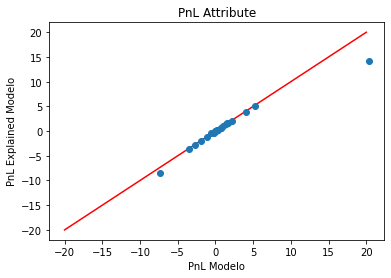

In [17]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-20, 20, 1000)

plt.plot(x, x, 'r-')
plt.plot(PnL_df['PnL_Modelo'].values, PnL_df['PnL_Modelo_Explained'].values, 'o')
plt.title('PnL Attribute')
plt.xlabel('PnL Modelo')
plt.ylabel('PnL Explained Modelo')

plt.show()

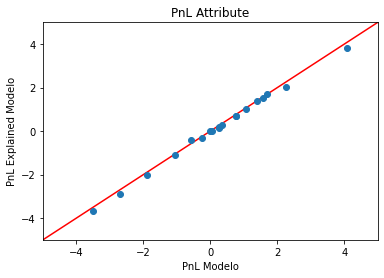

In [18]:
x = np.linspace(-20, 20, 1000)

plt.plot(x, x, 'r-')
plt.plot(PnL_df['PnL_Modelo'].values, PnL_df['PnL_Modelo_Explained'].values, 'o')
plt.title('PnL Attribute')
plt.xlabel('PnL Modelo')
plt.ylabel('PnL Explained Modelo')

plt.xlim(-5,5)
plt.ylim(-5,5)


plt.show()

## 1) Metodo de Montecarlo

In [19]:
from opcion_europea_bs import opcion_europea_bs
from opcion_europea_mc import opcion_europea_mc

import math

opcion_europea_mc
Def
    Calculador del precio de una opcion Europea con el modelo de MonteCarlo
Inputs
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
    - pasos : int - Cantidad de caminos de montecarlo
Outputs
    - precio_MC: float - Precio del contrato


In [20]:
#Inicializo los parametros

tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma = 0.25
div = 0

In [42]:
#Tomo un vector de normales aleatorias
pasos = 50
z = np.random.normal(0,1,pasos)





In [43]:
opcion = np.zeros(pasos) #En el ppt. C = C_i

In [44]:
for i in range(0,pasos):
    if tipo == "C":
        
        S_i = S * math.exp((r-div - 0.5 * math.pow(sigma,2)) * T + sigma * math.sqrt(T)  * z[i])
        
        payoff = max( 0 , S_i - K) # max(0,S_i-K)
    elif tipo == "P":
        payoff = max(0, K - S * math.exp((r-div - 0.5 * math.pow(sigma, 2)) * T + sigma * math.sqrt(T) * z[i]) )
    opcion[i] = math.exp(-r * T) * payoff #C_i


In [45]:
opcion

array([3.12825927e+01, 1.86368972e+01, 0.00000000e+00, 0.00000000e+00,
       1.61886245e+01, 3.98361218e+01, 0.00000000e+00, 0.00000000e+00,
       8.17389612e+00, 8.15188986e+00, 0.00000000e+00, 0.00000000e+00,
       4.78488599e+01, 6.06746855e+01, 0.00000000e+00, 3.06077201e+01,
       3.41304797e+01, 0.00000000e+00, 0.00000000e+00, 4.81299473e+00,
       1.65173847e+01, 0.00000000e+00, 4.31469444e+01, 3.02101173e+01,
       2.45996212e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.41104437e+01, 5.48524008e+01, 0.00000000e+00, 1.84163006e+01,
       5.43048984e+00, 0.00000000e+00, 9.39649589e+00, 1.09581397e+01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.50660846e+01,
       1.48895838e+01, 0.00000000e+00, 1.24154934e+01, 2.80557051e+01,
       1.83160225e+01, 0.00000000e+00, 2.96137440e-02, 5.32146694e+01,
       0.00000000e+00, 4.86965350e+01])

In [46]:



precio_MC = np.mean(opcion)

precio_MC

desvio = math.sqrt(np.var(opcion)/pasos)

print("precio",precio_MC)
print("desvio", desvio)

precio 14.37333615780427
desvio 2.485167429815154


### Convergencia del metodo

In [49]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0.0

pasos_vec = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,40,50,75,100,125,150,200,250,300, 500, 5000, 20000]      
precios = np.zeros(len(pasos_vec))

for index in range(len(pasos_vec)):
    precios[index] = opcion_europea_mc(tipo, S, K, T, r, sigma, div, pasos_vec[index])
 
precio_BS = opcion_europea_bs(tipo, S, K, T, r, sigma, div)

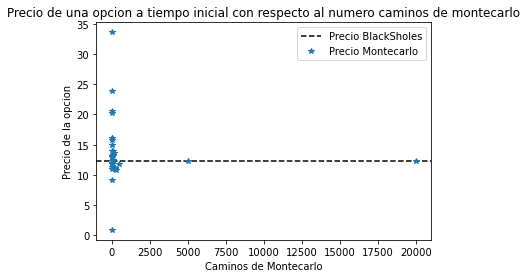

In [50]:
from matplotlib import pyplot as plt
plt.axhline(y=precio_BS, color = 'black', linestyle='--', label='Precio BlackSholes')
plt.plot(pasos_vec,precios,'*', label='Precio Montecarlo')

plt.legend()

plt.xlabel('Caminos de Montecarlo')
plt.ylabel('Precio de la opcion')
plt.title('Precio de una opcion a tiempo inicial con respecto al numero caminos de montecarlo')

plt.show()

In [52]:
print(precio_BS, precios)



12.335998930368717 [11.98976823 33.59725125  0.91483525 23.91350635  9.21477283 20.20658031
 11.89029141 13.03324353 13.14812256 15.77990585 11.38471104 20.59451456
 13.88973766 12.38143697 16.1694632  12.04557468 16.18183037 15.01965804
 10.95984924 12.44768129 13.22516796 13.94911685 13.66227452 11.17224099
 10.95196916 10.78588057 11.74945104 12.33757427 12.29897973]


# 2) Metodo de diferencias finitas

In [53]:
from opcion_americana_fd import opcion_americana_fd
from opcion_europea_fd import opcion_europea_fd

from scipy.interpolate import interp1d

opcion_europea_fd
Def
    Calculador del precio de una opcion Europea con el modelo de Diferencias Finitas (metodo explicito)
Inputs
    - tipo : string - Tipo de contrato entre ["CALL","PUT"]
    - S : float - Spot price del activo
    - K : float - Strike price del contrato
    - T : float - Tiempo hasta la expiracion (en años)
    - r : float - Tasa 'libre de riesgo' (anualizada)
    - sigma : float - Volatilidad implicita (anualizada)
    - div : float - Tasa de dividendos continuos (anualizada)
Outputs
    - precio_FD: float - Precio del contrato

In [54]:
tipo = "C"
S = 100
K = 100
T = 1
r = 0.05
sigma= 0.25
div =0.0

In [67]:
#Hadrcode de la grilla de diferencias finitas
M = 160
N = 1600

#M = 6
#N = 4


dS = 2 * S / M
dt = T / N

In [68]:
# Grilla de spots y tiempos
S_vec = np.linspace(0, 2*S, M+1)
t_vec = np.linspace(0, T, N+1)



In [69]:
# Armado de la matriz tridiagonal
j = np.arange(1,M)
j2 = np.zeros(M-1)
aj = np.zeros(M-1)
bj = np.zeros(M-1)
cj = np.zeros(M-1)

for index in range(0,M-1):
    sigma2 = sigma*sigma
    j2[index] = j[index] * j[index]
    aj[index] = 0.5 * dt * (sigma2 * j2[index]- (r-div) * j[index])
    bj[index] = 1-dt * (sigma2 * j2[index] + r)
    cj[index] = 0.5 * dt * (sigma2 * j2[index] + (r-div) * j[index])

In [71]:
# Matriz tridiagonal

A = np.diag(bj)
for index in range(0, M - 2):
    A[index + 1, index] = aj[index + 1]  # terms below the diagonal
    A[index, index + 1] = cj[index]  # terms above the diagonal
    


In [72]:
# Matriz de precios de la opcion
opcion_precios = np.zeros((M+1,N+1)) #V

In [73]:
#Condiciones de contorno

# Condicion final - Payoff

if tipo == "C":
    opcion_precios[:,-1] = np.maximum(S_vec - K, 0)
elif tipo == "P":
    opcion_precios[:,-1] = np.maximum(K - S_vec, 0)

In [74]:
# Casos limite en S=0 y S~inf

if tipo == "C":
    opcion_precios[0, :] = 0
    opcion_precios[-1, :] = S_vec[-1]*np.exp(-div*np.flip(t_vec)) - K * np.exp(-r*np.flip(t_vec))
elif tipo == "P":
    opcion_precios[0, :] = K * np.exp(-r * np.flip(t_vec))
    opcion_precios[-1, :] = 0 #K * np.exp(-r * np.flip(t_vec))

In [75]:
    
# Calculo en el interior
# variable auxiliar para sumar en la primer y ultimo fila
constantes_bordes = np.array((aj[0], cj[-1]))
for i in list(reversed(range(0,N))):

    opcion_precios[1:M,i] = A @ opcion_precios[1:M,i+1]
    #Offset the first and last terms
    opcion_precios[[1,M-1],i] = opcion_precios[[1,M-1],i] + constantes_bordes * opcion_precios[[0, M],i+1];

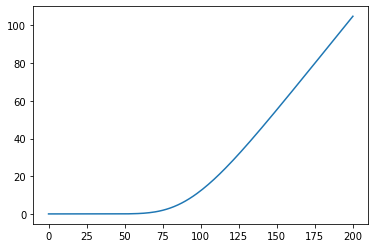

In [80]:
from matplotlib import pyplot as plt

plt.plot(S_vec,opcion_precios[:,0])

plt.show()

In [77]:
#En este punto ya esta TODA la grilla, ahora calculo lo requerido

f = interp1d(S_vec,opcion_precios[:,0])

S=100
precio_FD = float(f(S))




precio_FD


12.33380258723264

In [81]:
from mpl_toolkits import mplot3d

X, Y = np.meshgrid(t_vec, S_vec)
Z = opcion_precios

In [82]:
print('X', np.shape(X))
print('Y', np.shape(Y))
print('Z', np.shape(Z))

X (161, 1601)
Y (161, 1601)
Z (161, 1601)


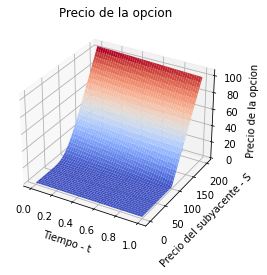

In [83]:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')#, edgecolor='none')#rstride=1, cstride=1,
                

ax.set_title('Precio de la opcion');
ax.set_xlabel('Tiempo - t')
ax.set_ylabel('Precio del subyacente - S')
ax.set_zlabel('Precio de la opcion')

plt.show()

# Comparacion de TODOS* los modelos vistos (caso de juguete)

### Fijo los parametros

In [4]:
import QuantLib as ql

S = 100
K = 100
sigma = 0.25 # the historical vols for a year
div =  0.0
r = 0.05

tipo = 'C'

option_type = ql.Option.Call

maturity_date = ql.Date(10, 8, 2021)
calculation_date = ql.Date(10, 8, 2020)
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()
ql.Settings.instance().evaluationDate = calculation_date

T = 1



## Pricers vistos en clase

### Importo los pricers vistos en clase

In [5]:
from opcion_europea_bs import opcion_europea_bs
from opcion_europea_mc import opcion_europea_mc
from opcion_europea_fd import opcion_europea_fd
from opcion_europea_bin import opcion_europea_bin

import timeit

### Corro cada uno de los pricers (les tomo el tiempo de ejecucion tambien)

In [6]:
start = timeit.default_timer()
precio_bs = opcion_europea_bs(tipo, S, K, T, r, sigma, div)
end = timeit.default_timer()
tiempo_bs = end - start


start = timeit.default_timer()
precio_bin = opcion_europea_bin(tipo, S, K, T, r, sigma, div, 5000)
end = timeit.default_timer()
tiempo_bin = end - start

start = timeit.default_timer()
precio_mc = opcion_europea_mc(tipo, S, K, T, r, sigma, div, 5000)
end = timeit.default_timer()
tiempo_mc = end - start

start = timeit.default_timer()
precio_fd = opcion_europea_fd(tipo, S, K, T, r, sigma, div)
end = timeit.default_timer()
tiempo_fd = end - start

## Precios QuantLib

### Seteo lo necesario en QuantLib

In [7]:
payoff = ql.PlainVanillaPayoff(option_type, K)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

spot_obj = ql.QuoteHandle(ql.SimpleQuote(S))

rate_obj = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, 
                                                            r, 
                                                    day_count))

dividend_obj = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, 
                                                      div, 
                                                      day_count))

vol_obj = ql.BlackVolTermStructureHandle(ql.BlackConstantVol(calculation_date, 
                                                                 calendar, 
                                                                 sigma, 
                                                             day_count))

bsm_process = ql.BlackScholesMertonProcess(spot_obj, 
                                        dividend_obj, 
                                        rate_obj, 
                                        vol_obj)



### Corro cada uno de los pricers (les tomo el tiempo de ejecucion tambien)

In [8]:

start = timeit.default_timer()
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
end = timeit.default_timer()
time_bs = end - start

start = timeit.default_timer()
european_option.setPricingEngine(ql.FdBlackScholesVanillaEngine(bsm_process))
fd_price = european_option.NPV()
end = timeit.default_timer()
time_fd = end - start

start = timeit.default_timer()
european_option.setPricingEngine(ql.MCEuropeanEngine(bsm_process, "PseudoRandom", timeSteps=20, requiredSamples=5000))
mc_price = european_option.NPV()
end = timeit.default_timer()
time_mc = end - start

start = timeit.default_timer()
european_option.setPricingEngine(ql.BinomialVanillaEngine(bsm_process, "crr", 5000))
bin_price = european_option.NPV()
end = timeit.default_timer()
time_bin = end - start



### Imprimo TODO

In [9]:
print("Precio modelo Europea BS visto en clase:", precio_bs)
print("Tiempo modelo Europea BS visto en clase:", tiempo_bs)

print("Precio modelo Europea Binomial visto en clase:", precio_bin)
print("Tiempo modelo Europea Binomial visto en clase:", tiempo_bin)

print("Precio modelo Europea Montecarlo visto en clase:", precio_mc)
print("Tiempo modelo Europea Montecarlo visto en clase:", tiempo_mc)

print("Precio modelo Europea Dif. Finitas visto en clase:", precio_fd)
print("Tiempo modelo Europea Dif. Finitas visto en clase:", tiempo_fd)


print("Precio modelo Europea BS QuantLib", bs_price)
print("Tiempo modelo Europea BS QuantLib:", time_bs)

print("Precio modelo Europea Binomial QuantLib:", bin_price)
print("Tiempo modelo Europea Binomial QuantLib:", time_bin)

print("Precio modelo Europea Montecarlo QuantLib:", mc_price)
print("Tiempo modelo Europea Montecarlo QuantLib:", time_mc)

print("Precio modelo Europea Dif. Finitas QuantLib:", fd_price)
print("Tiempo modelo Europea Dif. Finitas QuantLib:", time_fd)

Precio modelo Europea BS visto en clase: 12.335998930368717
Tiempo modelo Europea BS visto en clase: 0.0007696999819017947
Precio modelo Europea Binomial visto en clase: 12.33550453323051
Tiempo modelo Europea Binomial visto en clase: 11.218189100036398
Precio modelo Europea Montecarlo visto en clase: 12.319798658213948
Tiempo modelo Europea Montecarlo visto en clase: 0.014633399958256632
Precio modelo Europea Dif. Finitas visto en clase: 12.333802587232636
Tiempo modelo Europea Dif. Finitas visto en clase: 0.11474539997288957
Precio modelo Europea BS QuantLib 12.335998930368715
Tiempo modelo Europea BS QuantLib: 0.021080900041852146
Precio modelo Europea Binomial QuantLib: 12.335493341380698
Tiempo modelo Europea Binomial QuantLib: 0.05035670002689585
Precio modelo Europea Montecarlo QuantLib: 12.089213862443527
Tiempo modelo Europea Montecarlo QuantLib: 0.02590569999301806
Precio modelo Europea Dif. Finitas QuantLib: 12.343995594762795
Tiempo modelo Europea Dif. Finitas QuantLib: 0.0

### Tabla de precios por modelo

| Precio | Clase | QuantLib |
| --- | --- | --- |
| BS | 12.336 | 12.336 |
| Binomial | 12.33355 | 12.33347 |
| Montecarlo | _12.33747_ | _12.38694_ |
| Dif.Finitas | 12.33380 | 12.34399 |

### Tabla de tiempos de ejecucion por modelo**

| Tiempo | Clase | QuantLib |
| --- | --- | --- |
| BS | **0.00033** | **0.00023** |
| Binomial | 17.38176 | **0.06012** |
| Montecarlo | **0.72694** | 3.03739 |
| Dif.Finitas | 0.046359 | **0.001721** |